In [16]:
import numpy as np
import pandas as pd

import plotly.express as px
from networkx.algorithms.threshold import eigenvalues
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
np.random.seed(23)

In [18]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],
                     [0,1,0],
                     [0,0,1]])
class_sample1 = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class_sample1, columns=['col1','col2','col3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],
                     [0,1,0],
                     [0,0,1]])
class_sample2 = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class_sample2, columns=['col1','col2','col3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df.sample(40)

,col1,col2,col3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1
29,1.425140,1.441152,0.182561,0
31,2.224431,0.230401,1.192120,0
4,0.322272,0.060343,-1.043450,1
32,-0.723253,1.461259,-0.085367,0
33,2.823378,-0.332863,2.637391,0


In [19]:
fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='Grey')),
                  selector=dict(mode='marker'))
fig.show()

In [20]:
x = df.drop('target',axis=1)

In [21]:
x_scaled = StandardScaler().fit_transform(x)

In [22]:
cov_mat = np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
cov_mat

array([[1.34076734, 0.24528825, 0.10420627],
       [0.24528825, 1.12566959, 0.23643388],
       [0.10420627, 0.23643388, 1.327287  ]])

In [23]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [24]:
eigen_values

array([1.65691289, 1.22963722, 0.90717381])

In [25]:
eigen_vectors

array([[-0.61002583, -0.69239396,  0.3853039 ],
       [-0.53982115,  0.00718615, -0.84174906],
       [-0.58005311,  0.72148387,  0.37815264]])

In [26]:
pc = eigen_vectors[0:2]
pc

array([[-0.61002583, -0.69239396,  0.3853039 ],
       [-0.53982115,  0.00718615, -0.84174906]])

In [27]:
new_df = np.dot(df.iloc[:,0:3],pc.T)
new_df = pd.DataFrame(new_df, columns=['PC1','PC2'])
new_df['target'] = df['target']

new_df

,PC1,PC2,target
0,-0.724373,0.294692,1
1,-1.469510,0.377697,1
2,0.502355,1.303153,1
3,-0.582337,-1.523289,1
4,-0.640420,0.704788,1
5,0.745196,-0.401869,1
6,1.693497,1.155381,1
7,-0.697411,-1.244046,1
8,0.459927,-0.022297,1
9,-1.364602,0.346834,1


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


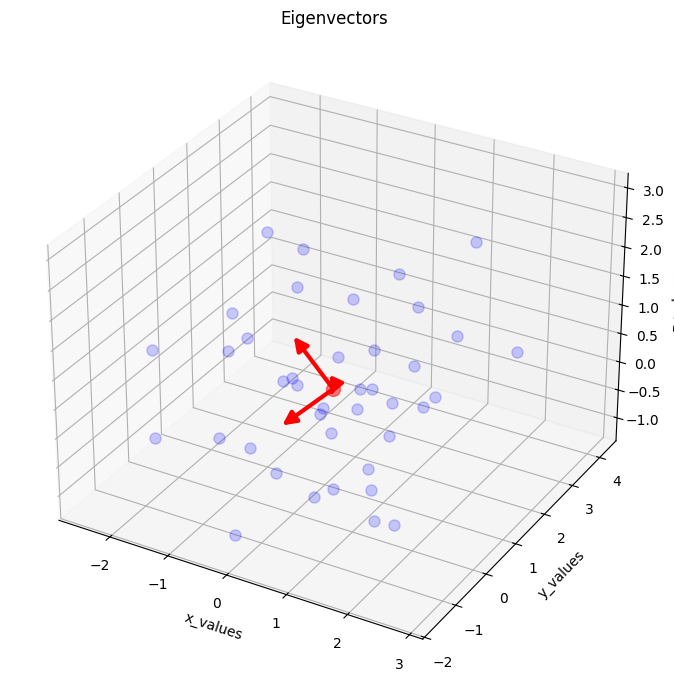

In [34]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

    def draw(self, renderer):
        super().draw(renderer)

# --- Plotting ---
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Data Points
ax.plot(df['col1'], df['col2'], df['col3'], 'o', markersize=8, color='blue', alpha=0.2)

# Mean Point
mean_x, mean_y, mean_z = df['col1'].mean(), df['col2'].mean(), df['col3'].mean()
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)

# Eigenvectors
for v in eigen_vectors.T:
    # Optional: Multiply 'v' by a scalar if the arrows are too small to see
    a = Arrow3D([mean_x, mean_x + v[0]], 
                [mean_y, mean_y + v[1]], 
                [mean_z, mean_z + v[2]], 
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.tight_layout()
plt.show()

In [29]:
new_df['target'] = new_df['target'].astype('str')

fig = px.scatter(new_df,
                 x='PC1',
                 y='PC2',
                 color='target',
                 color_discrete_sequence=px.colors.qualitative.G10)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='Grey')),
                  selector=dict(mode='marker'))
fig.show()